In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import argparse
import scipy.stats

def load_csv(fname):
    df = pd.read_csv(fname)
    df["time"] =  pd.to_datetime(df['time'], errors='coerce', unit='ms')
    df['acc'] = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)
    df['mag'] = np.sqrt(df['mag_x']**2 + df['mag_y']**2 + df['mag_z']**2)
    return df

df = load_csv("/Volumes/data/28.CSV")

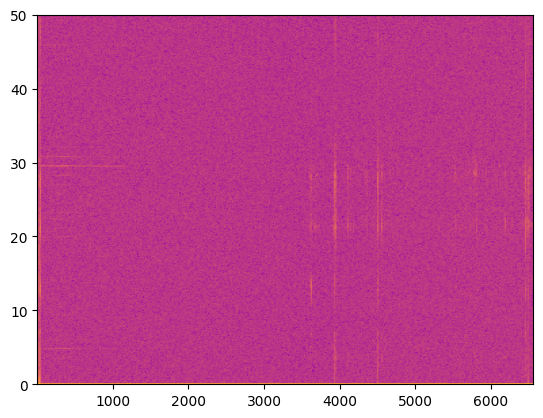

In [164]:
dt = df['time'].diff().dt.total_seconds()[1:]
sample_rate = 1.0 / np.median(dt)
plt.specgram(df['acc_z'], Fs=sample_rate, NFFT=2048, noverlap=256, cmap="plasma")
plt.show()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.83, 0.93, 1.03, 1.13, 1.23, 1.33, 1.43, 1.53, 1.63, 1.73, 1.83]),
 <BarContainer object of 10 artists>)

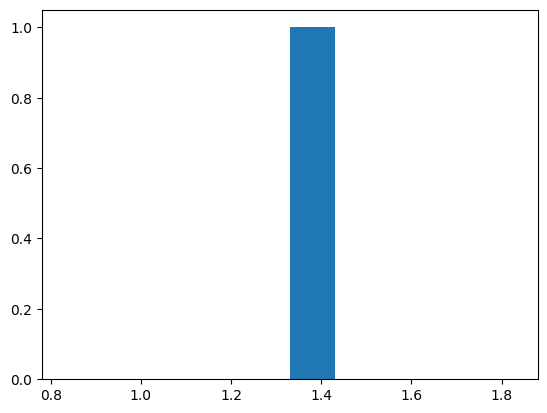

In [147]:
plt.hist(dt[dt != 0.01])

0       0.756
1       0.750
2       0.757
3       0.763
4       0.765
        ...  
2043    0.764
2044    0.762
2045    0.760
2046    0.762
2047    0.759
Name: acc_x, Length: 2048, dtype: float64


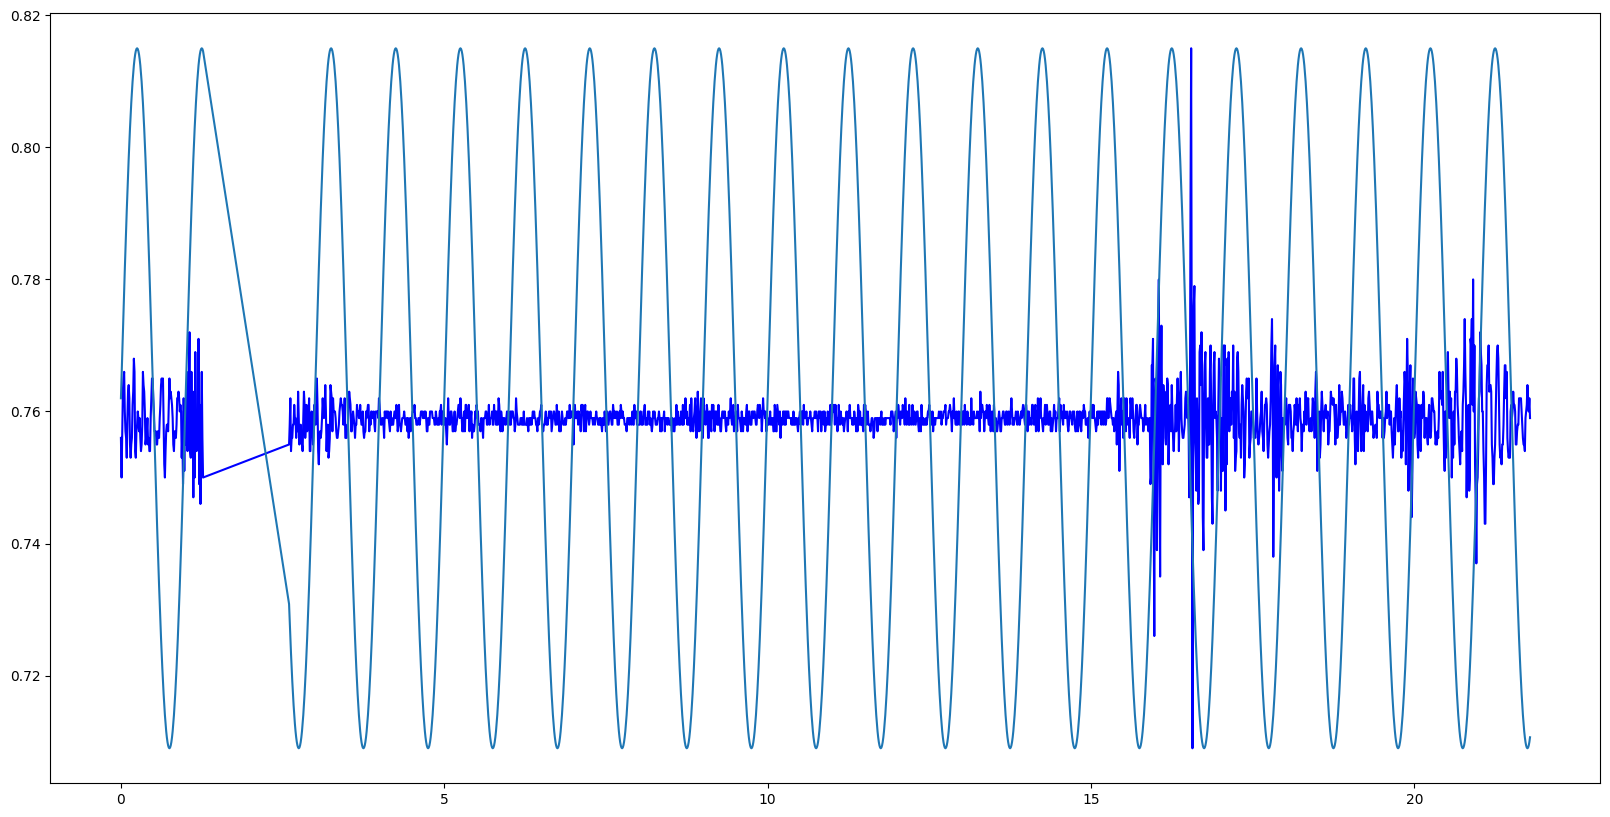

In [143]:
plt.subplots(figsize=(20, 10))

range_min = 0
range_max = 2048#range_min + 1024

times = (df['time'][range_min:range_max] - df['time'][range_min]).dt.total_seconds()

values = df['acc_x'][range_min:range_max]
print(values)
min_value = np.min(values)
max_value = np.max(values)
plt.plot(times, values, c='b')
plt.plot(times, (np.sin(2 * np.pi * times) / 2 + 0.5) * (max_value - min_value) + min_value)

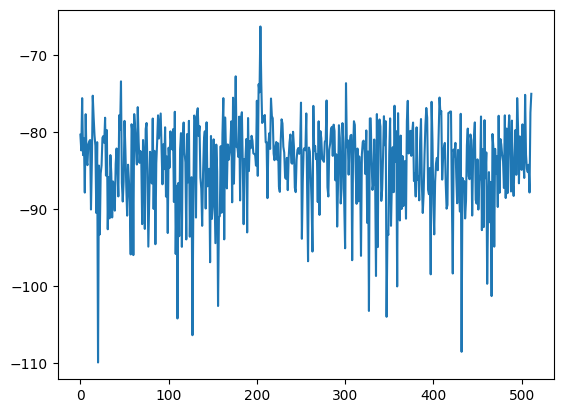

In [135]:
N = range_max - range_min
fs = 0.01

# Calculate real FFT and frequency vector
sp = np.fft.rfft(values)
freq = np.arange((N / 2) + 1) / (float(N) / fs)

# Scale the magnitude of FFT by window and factor of 2,
# because we are using half of FFT spectrum.
s_mag = np.abs(sp) * 2 / N

# Convert to dBFS
s_dbfs = 20 * np.log10(s_mag)

plt.plot(s_dbfs[1:])
